# Community Detection

## 1.

In [31]:
import networkx as nx
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
import math

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [32]:
gml_files = [f for f in os.listdir("datasets/") if f.endswith(".gml")]

graphs = {path.split(".")[0]: nx.read_gml(os.path.join("datasets/", path)) for path in gml_files}


In [33]:
communities_greedy = {k: nx.community.greedy_modularity_communities(v) for k, v in graphs.items()}
communities_label = {k: nx.community.label_propagation_communities(v) for k, v in graphs.items()}

In [34]:
def plot(G: nx.Graph, communities: list, name_graph: str):
    num_communities = len(communities)
    cmap = cm.get_cmap('tab20', num_communities)

    node_color_map = {}
    for i, community in enumerate(communities):
        color = cmap(i)
        for node in community:
            node_color_map[node] = color

    node_colors = [node_color_map[node] for node in G.nodes()]

    intra_edges = []
    inter_edges = []

    node_community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            node_community_map[node] = i

    for u, v in G.edges():
        if node_community_map[u] == node_community_map[v]:
            intra_edges.append((u, v))
        else:
            inter_edges.append((u, v))


    pos = {}
    communities_pos = {}
    radius = 7
    angle_between_communities = 2 * math.pi / num_communities

    for i in range(num_communities):
        theta = i * angle_between_communities
        x = radius * math.cos(theta)
        y = radius * math.sin(theta)
        communities_pos[i] = (x, y)

    for i, community in enumerate(communities):
        community_center = communities_pos[i]
        num_nodes = len(community)
        angle_between_nodes = 2 * math.pi / num_nodes if num_nodes > 1 else 0
        node_radius = 2

        for j, node in enumerate(community):
            if num_nodes == 1:
                x = community_center[0]
                y = community_center[1]
            else:
                theta = j * angle_between_nodes
                x = community_center[0] + node_radius * math.cos(theta)
                y = community_center[1] + node_radius * math.sin(theta)
            pos[node] = (x, y)

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200, edgecolors='black')

    # intra-community edges (solid lines)
    nx.draw_networkx_edges(G, pos, edgelist=intra_edges, edge_color='gray', style='solid', width=1)

    # inter-community edges (dashed lines)
    nx.draw_networkx_edges(G, pos, edgelist=inter_edges, edge_color='red', style='dashed', alpha=0.5, width=1)

    plt.title(name_graph)
    plt.axis('off')
    plt.show()

## Greedy Modularity Maximization Algorithm

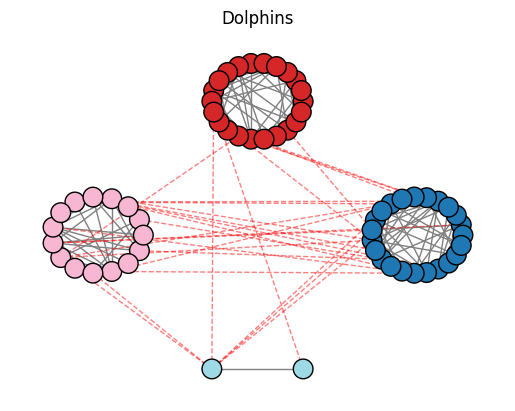

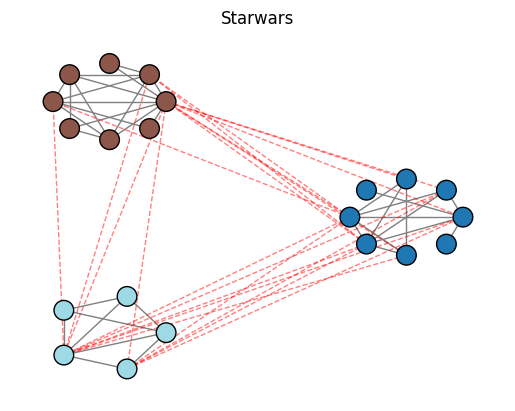

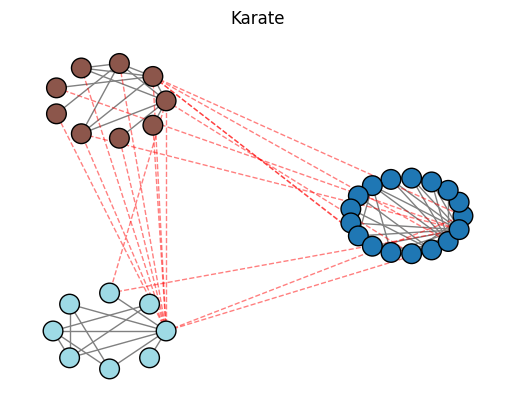

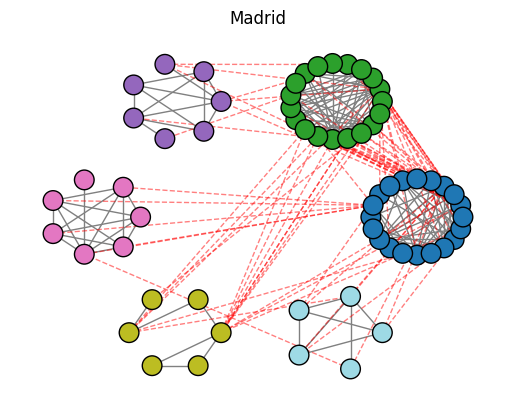

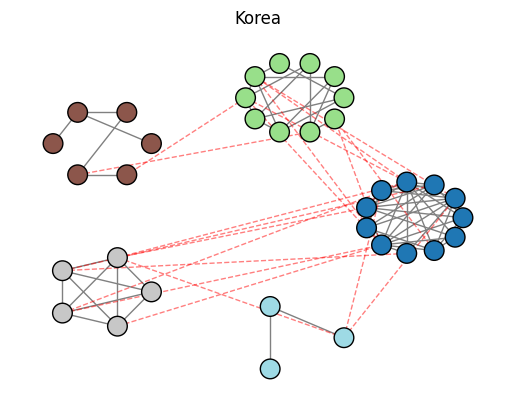

In [35]:
for name, graph in graphs.items():
    plot(graph, communities_greedy[name], name)

## Label Propagation Algorithm

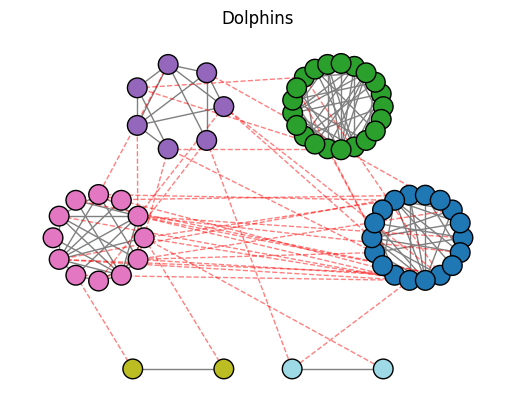

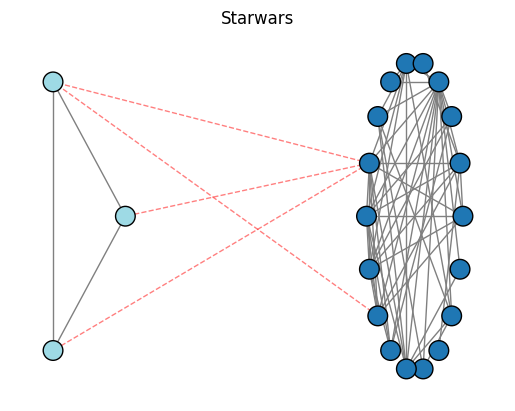

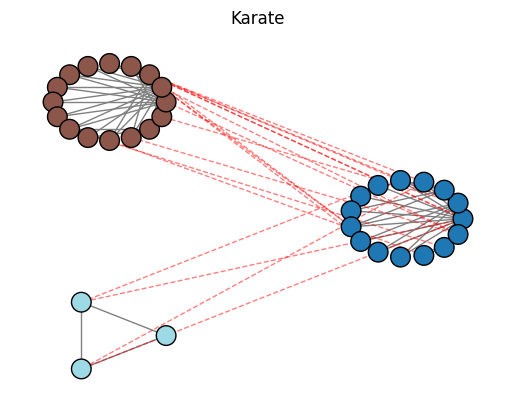

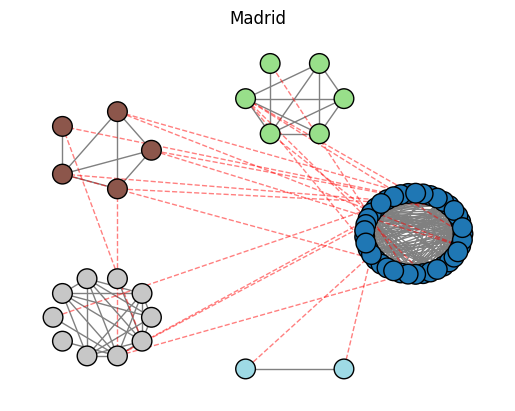

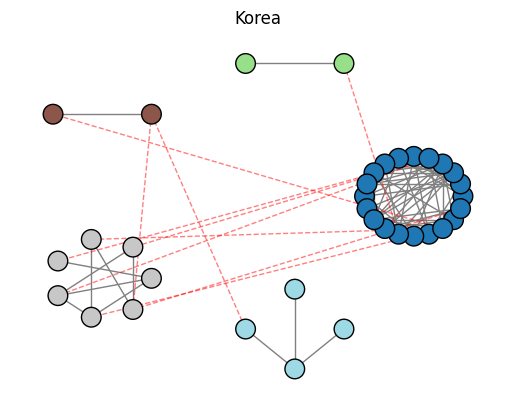

In [36]:
for name, graph in graphs.items():
    plot(graph, communities_label[name], name)

# 2.

In [37]:
random_graphs = {
    path.split(".")[0]: nx.algorithms.smallworld.random_reference(nx.read_gml(os.path.join("datasets/", path))) for path
    in gml_files
}
random_communities_greedy = {k: nx.community.greedy_modularity_communities(v) for k, v in random_graphs.items()}
random_communities_label = {k: nx.community.label_propagation_communities(v) for k, v in random_graphs.items()}

## Randomized Greedy Modularity Maximization Algorithm

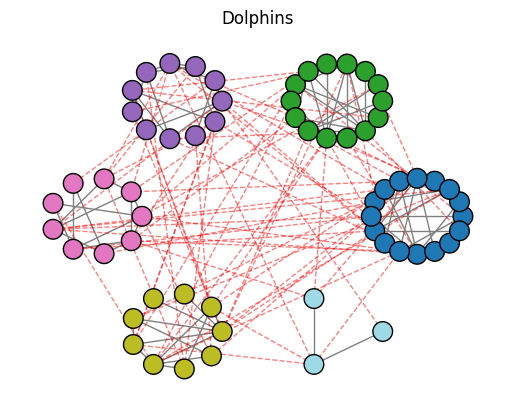

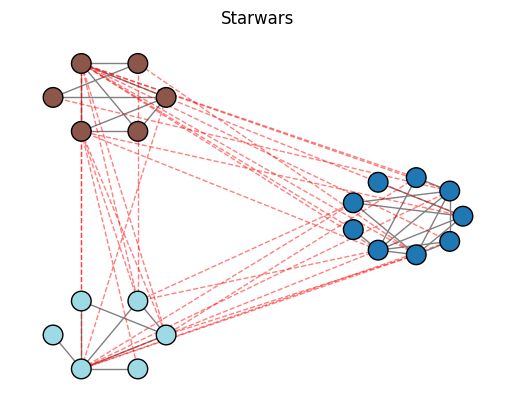

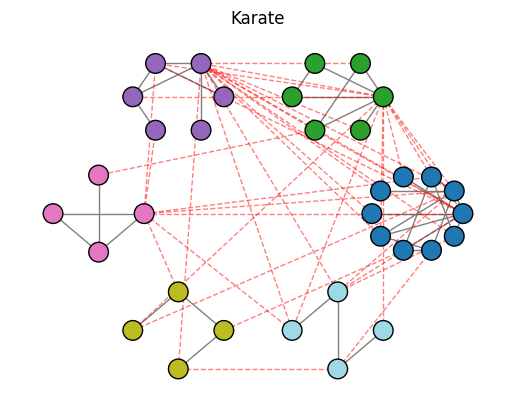

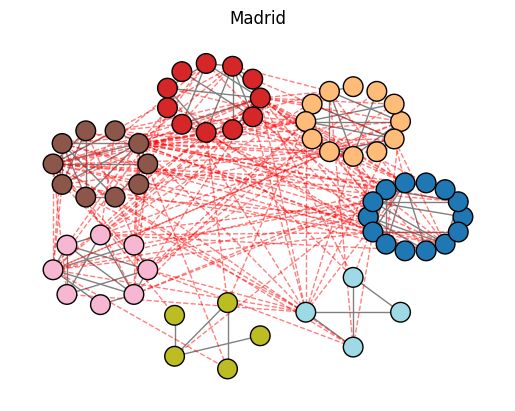

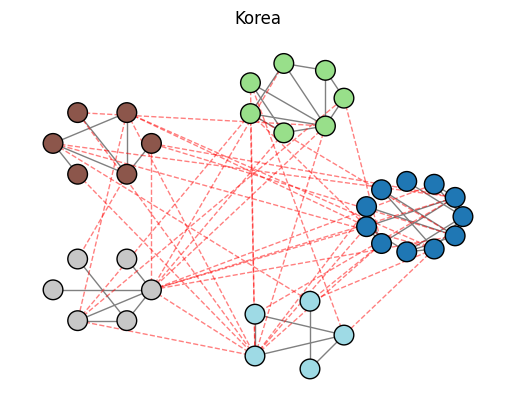

In [38]:
for name, graph in random_graphs.items():
    plot(graph, random_communities_greedy[name], name)

## Randomized Label Propagation Algorithm

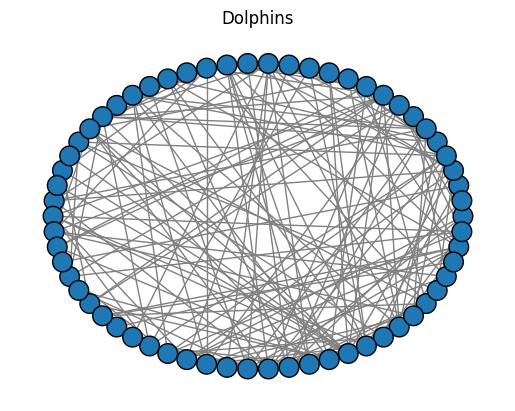

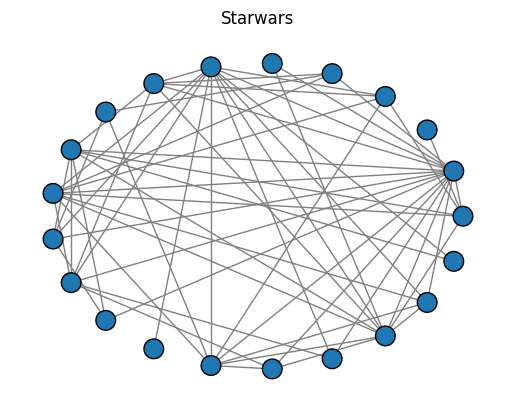

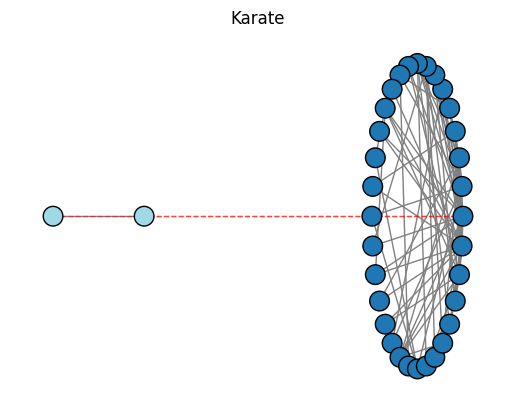

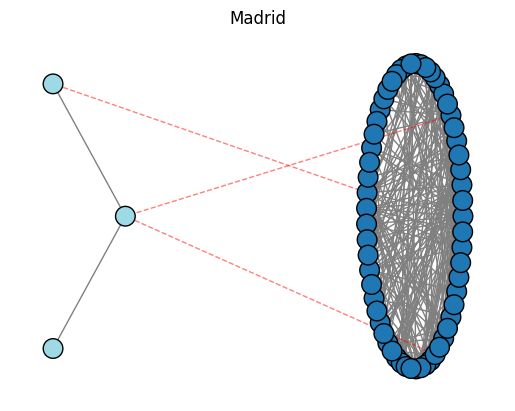

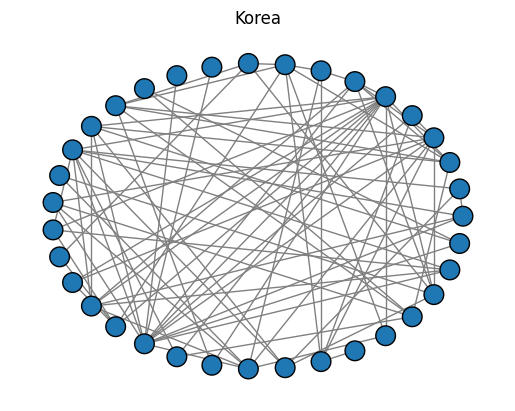

In [39]:
for name, graph in random_graphs.items():
    plot(graph, random_communities_label[name], name)